In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
## Simulate some data on a two-dimensional plane.
## the function will return (1) a set of data (2) the true labels for each observation

In [3]:
from sklearn.datasets import make_blobs

twoData,cluster_true=make_blobs(n_samples=300,centers=4,
                               cluster_std=0.50,random_state=0)

print("Here are the first 10 rows of twoData:")
print(twoData[:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])

Here are the first 10 rows of twoData:
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each observation. But we don't need it.
[1 3 0 3 1 1 2 0 3 3]


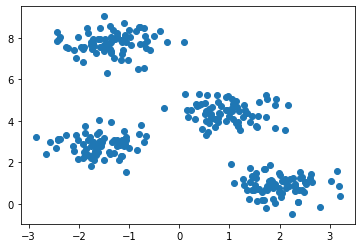

In [6]:
plt.scatter(twoData[:,0],twoData[:,1]);

In [7]:
from sklearn.cluster import KMeans

KMeans()is fairly straight-forward. We need to:  
1. Initialize the model by telling KMeans() the number of k.  
2. Feed the data to the model.  
3. Call predict() and use the data to get the clustering result.

In [8]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(twoData)
cluster_kmeans=kmeans.predict(twoData)

In [9]:
## Visualize the results by plotting the data colored by these labels. 
# We will also plot the cluster centers as determined by the k-means estimator.

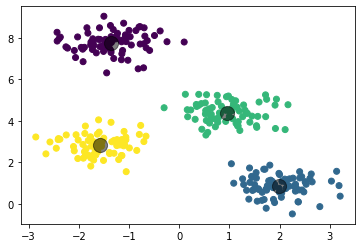

In [10]:
plt.scatter(twoData[:,0],twoData[:,1],c=cluster_kmeans,cmap='viridis') # Use cluster_means as the indicator for clusters
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5) # plotting the centers onto scatter plot
# c=color,s=dot size, alpha=transparency

### Silhoutte Coefficient and Silhoutte Plot

In [11]:
from sklearn.metrics import silhouette_score
silhouetteScore=silhouette_score(twoData,cluster_kmeans,metric='euclidean')
print('Silhouette Score:',silhouetteScore)

Silhouette Score: 0.7356713838266389


In [12]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Learning\CU\Courses\EDM\ANACONDA\ANA

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytest-runner-5.3.1        |     pyhd3eb1b0_0          11 KB
    yellowbrick-1.2            |           py38_0         281 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         291 KB

The following NEW packages will be INSTALLED:

  pytest-runner      pkgs/main/noarch::pytest-runner-5.3.1-pyhd3eb1b0_0
  yellowbrick        districtdatalabs/win-64::yellowbrick-1.2-py38_0




pytest-runner-5.3.1  | 11 KB     |            |   0% 
pytest-runner-5.3.1  | 11 KB     | ########## | 100% 
Note: you may need to restart the kernel to use updated packages.
pytest-runner-5.3.1  | 11 KB     | #####

In [18]:
conda install -c conda-forge yellowbrick

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Learning\CU\Courses\EDM\ANACONDA\ANA

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    yellowbrick-1.3.post1      |     pyhd8ed1ab_1         154 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         154 KB

The following packages will be UPDATED:

  yellowbrick        districtdatalabs/win-64::yellowbrick-~ --> conda-forge/noarch::yellowbrick-1.3.post1-pyhd8ed1ab_1




yellowbrick-1.3.post | 154 KB    |            |   0% 
yellowbrick-1.3.post | 154 KB    | #          |  10% 
yellowbrick-1.3.post | 154 KB    | ########## | 100% 
yellowbrick-1.3.post | 154 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing tr

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer

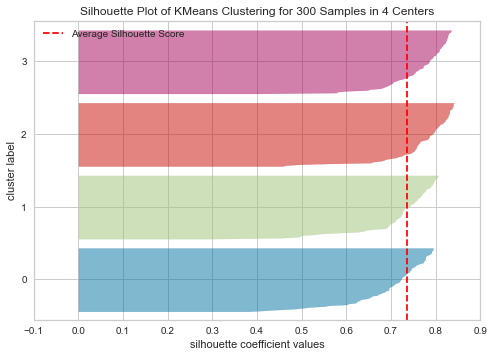

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
smodel=KMeans(n_clusters=4)
visualizer=SilhouetteVisualizer(smodel,colors='yellowbrick')

visualizer.fit(twoData)
visualizer.show()
# Theses two lines needs to be run at the same time otherwise, you won't have the labels in x,y axies.

In [22]:
## The same functionality above can be achieved with the associated quick method silhouette_visualizer.
# this method will build the Silhouette Visualizer object wiht the associated arguments, fit it, then immediately show it.

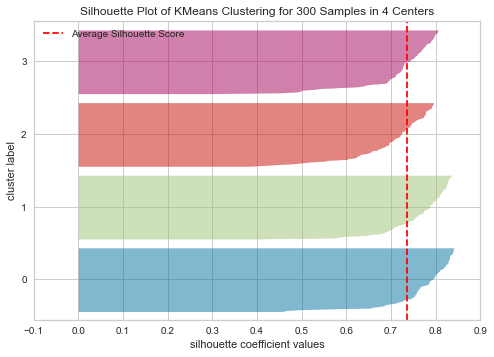

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [23]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans,twoData,colors='yellowbrick')

### A more realistic example: Self-Reported Motivation  
The data contains some self-reported motivation scores for a class over five weeks. We are going to look for patterns in motivation over this time and sort people into clusters based on those patterns.

In [24]:
import os
os.chdir('D:\\Learning\\CU\\Courses\\EDM\\Output')

In [25]:
motivation=pd.read_csv("ICE5_Data.csv")
motivation

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0
3,10008216,1,2.0,1,2.0,NaN
4,10026216,3,NaN,3,NaN,NaN
5,10014216,2,NaN,2,NaN,2.0
6,10021216,2,2.0,2,2.0,2.0
7,10013216,2,NaN,2,NaN,1.0
8,10035216,2,3.0,2,3.0,NaN
9,10015216,2,2.0,2,2.0,2.0


In [26]:
# the algorithm will treat each row as a value belonging to a person, so we need to remove the id variable.
# we also need to filter out all the NAs because k-Means won't work if it only sees parial data.

In [28]:
motivationNA=motivation.dropna()
motivationClean=motivationNA.drop(['id'],axis=1)
motivationClean

,motivation1,motivation2,motivation3,motivation4,motivation5
0,2,2.0,2,2.0,2.0
2,1,2.0,1,2.0,2.0
6,2,2.0,2,2.0,2.0
9,2,2.0,2,2.0,2.0
11,2,1.0,2,1.0,2.0
13,2,3.0,2,3.0,1.0
14,1,1.0,1,1.0,4.0
16,1,1.0,1,1.0,3.0
17,1,1.0,1,1.0,1.0
18,1,1.0,1,1.0,1.0


In [29]:
# Try 2 clusters first
motivationkmeans2=KMeans(n_clusters=2)
motivationkmeans2.fit(motivationClean)
cluster_motivation2=motivationkmeans2.predict(motivationClean)

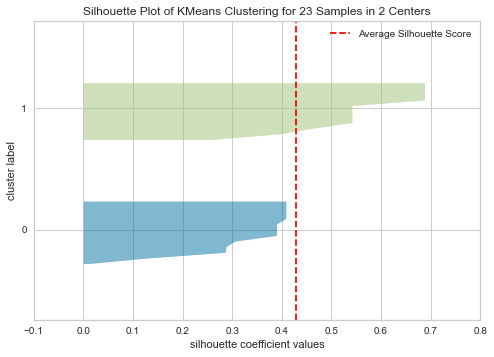

Silhouette Score: 0.4278253443934091


In [31]:
# Check the efficiency of kmeans2
silhouette_visualizer(motivationkmeans2,motivationClean,colors='yellowbrick')
silhouetteScore2=silhouette_score(motivationClean,cluster_motivation2,metric='euclidean')
print('Silhouette Score:',silhouetteScore2)

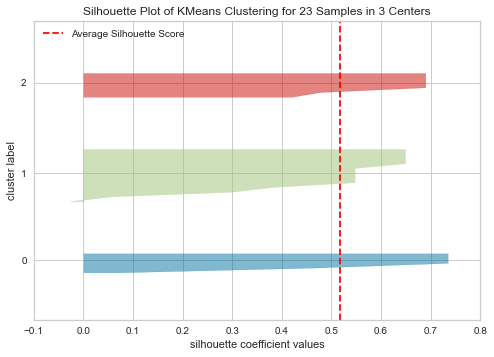

Silhouette Score: 0.5165992450764493


In [32]:
# Try 3 clusters
motivationkmeans3=KMeans(n_clusters=3)
motivationkmeans3.fit(motivationClean)
cluster_motivation3=motivationkmeans3.predict(motivationClean)

silhouette_visualizer(motivationkmeans3,motivationClean,colors='yellowbrick')
silhouetteScore3=silhouette_score(motivationClean,cluster_motivation3,metric='euclidean')
print('Silhouette Score:',silhouetteScore3)

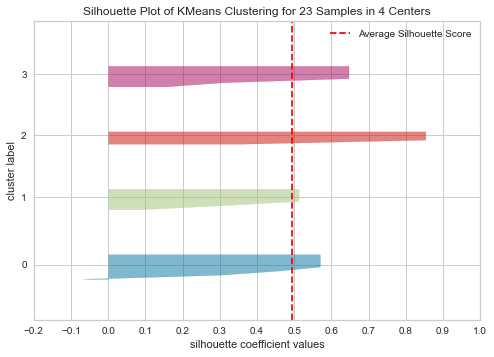

Silhouette Score: 0.4939757511461826


In [34]:
# Try 4 clusters
motivationkmeans4=KMeans(n_clusters=4)
motivationkmeans4.fit(motivationClean)
cluster_motivation4=motivationkmeans4.predict(motivationClean)
silhouette_visualizer(motivationkmeans4,motivationClean,colors='yellowbrick')
silhouetteScore4=silhouette_score(motivationClean,cluster_motivation4,metric='euclidean')
print('Silhouette Score:',silhouetteScore4)

#### Create a new dataframe to contain the clustering result

In [35]:
## The regular = wouldn't work because motivationClean will be changed as motivation3cluster changes
motivation3cluster=motivationClean.copy(deep=True)
motivation3cluster['cluster']=cluster_motivation3
motivation3cluster

,motivation1,motivation2,motivation3,motivation4,motivation5,cluster
0,2,2.0,2,2.0,2.0,2
2,1,2.0,1,2.0,2.0,1
6,2,2.0,2,2.0,2.0,2
9,2,2.0,2,2.0,2.0,2
11,2,1.0,2,1.0,2.0,0
13,2,3.0,2,3.0,1.0,2
14,1,1.0,1,1.0,4.0,1
16,1,1.0,1,1.0,3.0,1
17,1,1.0,1,1.0,1.0,0
18,1,1.0,1,1.0,1.0,0
